In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [3]:
df = pd.read_csv('Global_YouTube_Statistics.csv',encoding='iso-8859-1')

In [4]:
df_cleaned = df.replace('nan', pd.NA)  # Replace 'nan' with pandas' NA for numeric columns
numeric_columns = ['rank', 'subscribers', 'video views', 'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
                   'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'Unemployment rate']

for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    
df_cleaned = df_cleaned.dropna()

In [5]:
thai_data_filter = df_cleaned[df_cleaned['Country']== 'Thailand']
thai_data_filter

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
82,83,WorkpointOfficial,39000000,3.613123e+10,Entertainment,WorkpointOfficial,72580,Thailand,TH,Entertainment,...,200000.0,2012.0,Nov,5.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
93,94,ýýýýýýýýýýýý one31,37500000,2.726246e+10,Entertainment,ýýýýýýýýýýýý one31,117152,Thailand,TH,Entertainment,...,300000.0,2013.0,Jan,10.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
125,126,Ch3Thailand,33500000,2.961191e+10,Entertainment,Ch3Thailand,96214,Thailand,TH,Entertainment,...,100000.0,2014.0,May,29.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
453,454,GRAMMY GOLD OFFICIAL,18600000,2.019670e+10,Music,GRAMMY GOLD OFFICIAL,6287,Thailand,TH,Music,...,100000.0,2014.0,Jan,15.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
462,463,RsiamMusic : ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,18400000,1.154430e+10,Music,RsiamMusic : ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,3159,Thailand,TH,Music,...,100000.0,2011.0,Mar,8.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
516,517,AMARINTV : ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,17400000,1.304356e+10,Entertainment,AMARINTV : ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,118448,Thailand,TH,News,...,200000.0,2014.0,Feb,5.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
568,569,Ch7HD,16400000,9.463244e+09,Entertainment,Ch7HD,56203,Thailand,TH,Entertainment,...,100000.0,2010.0,May,17.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
571,572,GMMTV OFFICIALï¿½ï¿½,16400000,1.284443e+10,Entertainment,GMMTV OFFICIALï¿½ï¿½,23952,Thailand,TH,Entertainment,...,200000.0,2010.0,Sep,13.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
586,587,Thairath Online,16200000,1.456384e+10,News & Politics,Thairath Online,244899,Thailand,TH,News,...,100000.0,2010.0,Sep,27.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
643,644,Genierock,15400000,1.456417e+10,Music,Genierock,1725,Thailand,TH,Music,...,100000.0,2008.0,Mar,9.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541


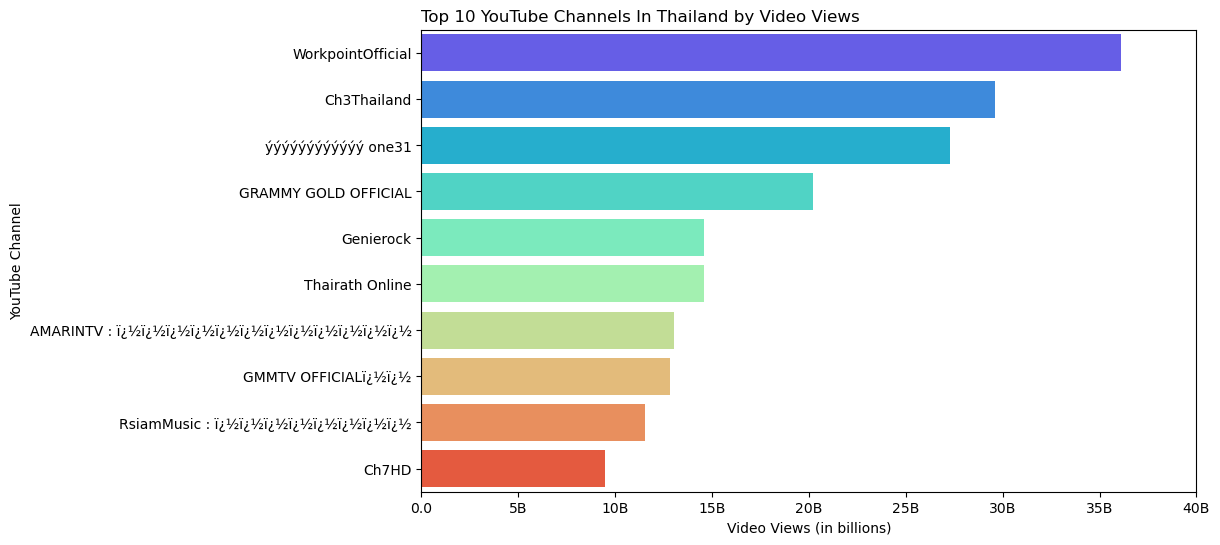

In [6]:
top_subscribers = thai_data_filter.sort_values('video views').nlargest(10,['video views'])

plt.figure(figsize=[10,6])
chanel_view_plot = sns.barplot(data=top_subscribers,x='video views',y='Youtuber',palette='rainbow')
plt.title('Top 10 YouTube Channels In Thailand by Video Views',loc='left')
plt.xlabel('Video Views (in billions)')
plt.ylabel('YouTube Channel')
plt.xlim(0, 40000000000)

def format_ticks(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    else:
        return value

chanel_view_plot.xaxis.set_major_formatter(FuncFormatter(format_ticks))

Text(0.5, 1.0, 'Famous Chanel Type in Thailand')

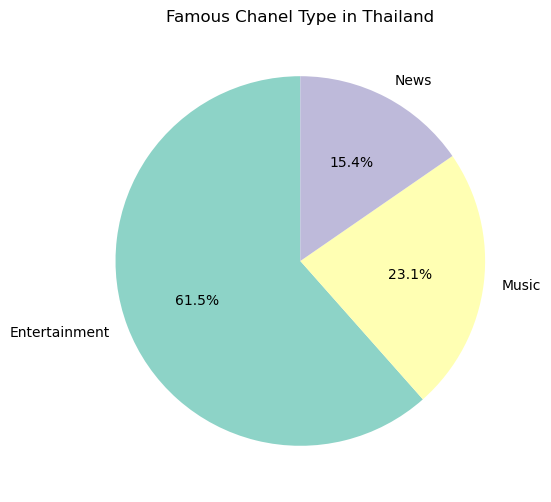

In [7]:
category_counts = thai_data_filter['channel_type'].value_counts()
labels = category_counts.index
counts = category_counts.values


plt.figure(figsize=(8,6))
plt.pie(counts, labels=labels,colors=sns.color_palette('Set3'),startangle=90, autopct='%1.1f%%')
plt.title('Famous Chanel Type in Thailand')

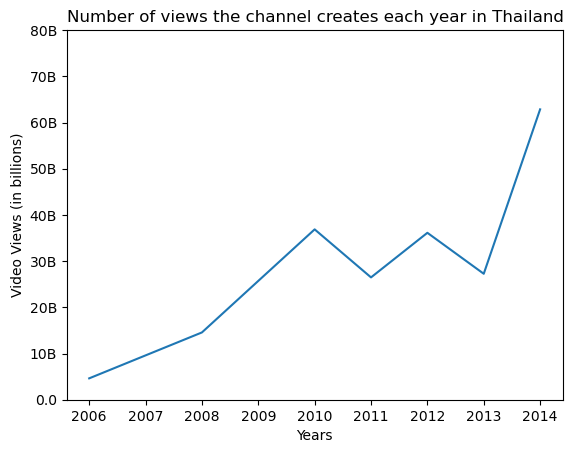

In [8]:
thai_views_grow = pd.DataFrame(thai_data_filter.groupby('created_year')['video views'].sum()).reset_index()
thai_views_grow.rename(columns={0:"Years",1:"Video Views"})
views_grow = sns.lineplot(data=thai_views_grow,x='created_year',y='video views')
plt.title('Number of views the channel creates each year in Thailand',loc='left')
plt.ylabel('Video Views (in billions)')
plt.xlabel('Years')
plt.ylim(0, 80000000000)

def format_ticks(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    else:
        return value

views_grow.yaxis.set_major_formatter(FuncFormatter(format_ticks))

In [9]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


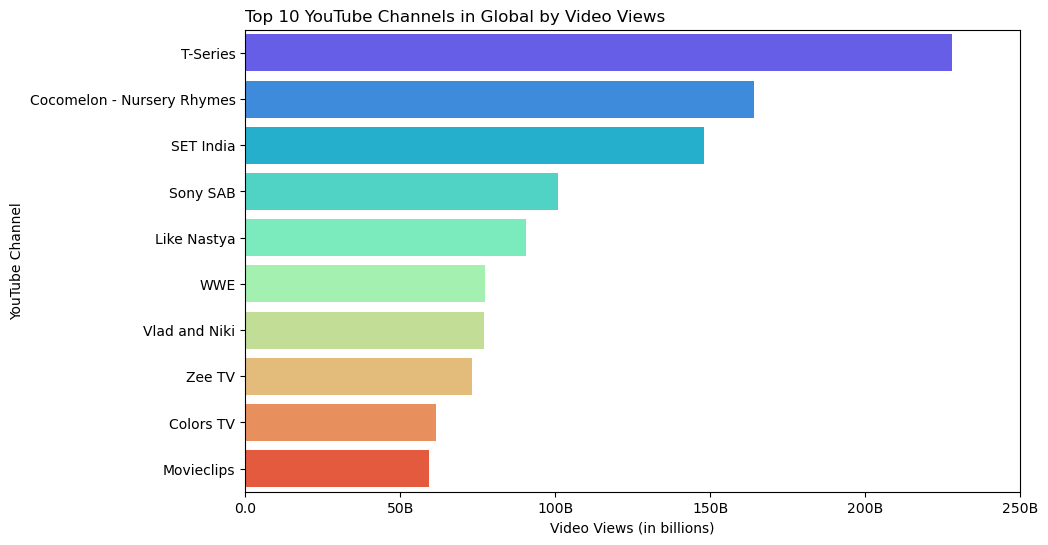

In [10]:
top_10_videoviews = df_cleaned.nlargest(10, 'video views')

plt.figure(figsize=[10,6])
chanel_view_plot = sns.barplot(data=top_10_videoviews,x='video views',y='Youtuber',palette='rainbow')
plt.title('Top 10 YouTube Channels in Global by Video Views',loc='left')
plt.xlabel('Video Views (in billions)')
plt.ylabel('YouTube Channel')
plt.xlim(0, 250000000000)

def format_ticks(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    else:
        return value

chanel_view_plot.xaxis.set_major_formatter(FuncFormatter(format_ticks))

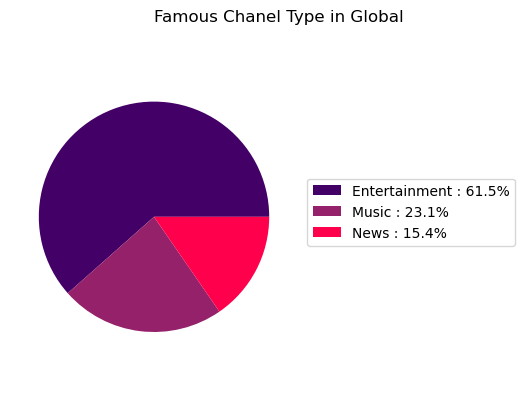

In [11]:
labels=[]
for i in range(0,len(category_counts)):
    labels.append(""+str(category_counts.index[i])+" : "+str(round(category_counts.values[i]/sum(category_counts.values)*100,1))+"%")
labels

colors=["#430067", "#94216a", "#ff004d", "#ff8426", "#ffdd34", "#50e112", "#3fa66f", "#365987", "#000000", "#0033ff", "#29adff", "#00ffcc", "#fff1e8", "#c2c3c7"]

title = plt.title('Famous Chanel Type in Global')
title.set_ha("left")
plt.gca().axis("equal")
pie = plt.pie(counts, startangle=0,colors=colors)
plt.legend(pie[0],labels, bbox_to_anchor=(0.8,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

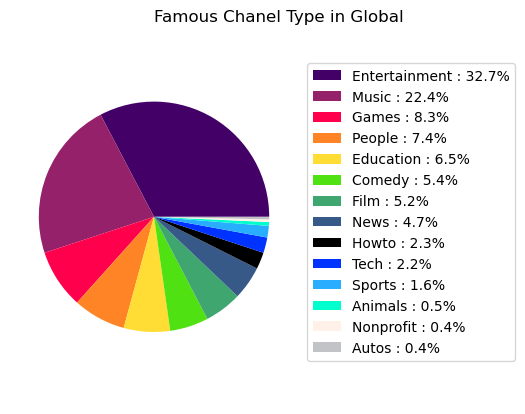

In [12]:
category_counts = df_cleaned['channel_type'].value_counts()
counts = category_counts.values
labels=[]
for i in range(0,len(category_counts)):
    labels.append(""+str(category_counts.index[i])+" : "+str(round(category_counts.values[i]
    /sum(category_counts.values)*100,1))+"%")
labels

colors=["#430067", "#94216a", "#ff004d", "#ff8426", "#ffdd34", "#50e112", "#3fa66f",
        "#365987", "#000000", "#0033ff", "#29adff", "#00ffcc", "#fff1e8", "#c2c3c7"]

title = plt.title('Famous Chanel Type in Global')
title.set_ha("left")
plt.gca().axis("equal")
pie = plt.pie(counts, startangle=0,colors=colors)
plt.legend(pie[0],labels, bbox_to_anchor=(0.8,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

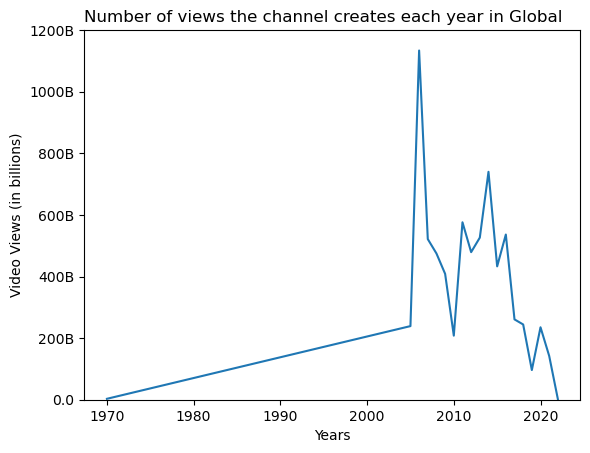

In [13]:
global_views_grow = df_cleaned.nlargest(10, 'video views')
global_views_grow = pd.DataFrame(df_cleaned.groupby('created_year')['video views'].sum()).reset_index()
global_views_grow.rename(columns={0:"Years",1:"Video Views"})
views_grow = sns.lineplot(data=global_views_grow,x='created_year',y='video views')
plt.title('Number of views the channel creates each year in Global',loc='left')
plt.ylabel('Video Views (in billions)')
plt.xlabel('Years')
plt.ylim(0, 1200000000000)

def format_ticks(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    else:
        return value

views_grow.yaxis.set_major_formatter(FuncFormatter(format_ticks))